In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn import datasets

In [3]:
#Generating two dimensional data with some overlap from multivariate normal distribution

np.random.seed(1)
number_of_observations = 1000
x1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], number_of_observations)
x2 = np.random.multivariate_normal([1, 3], [[1, 0.5], [0.5, 1]], number_of_observations)

In [4]:
generated_features = np.vstack((x1, x2)).astype('float32')
print(generated_features)

[[-1.1008462  -1.7126026 ]
 [ 0.99389446 -0.07907416]
 [ 0.40130436 -1.9002343 ]
 ...
 [ 1.7513058   3.6254027 ]
 [ 2.2536411   3.4097278 ]
 [ 0.18723287  2.7244473 ]]


In [5]:
generated_labels = np.hstack((np.zeros(number_of_observations), np.ones(number_of_observations)))
print(generated_labels)

[0. 0. 0. ... 1. 1. 1.]


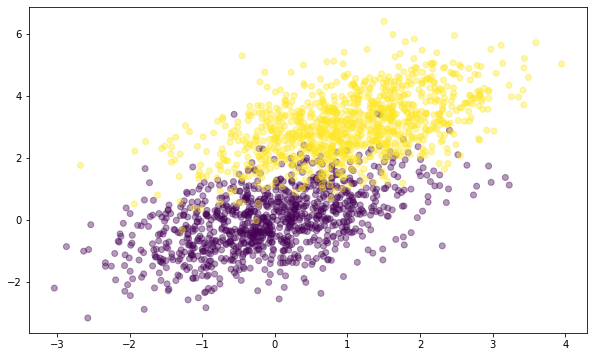

In [6]:
#Plotting the generated data from multivariate normal distribution
plt.figure(figsize=(10,6))
plt.scatter(generated_features[:, 0], generated_features[:,1], c=generated_labels,alpha=0.4)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(generated_features, generated_labels, test_size = 0.15, train_size = 0.85, random_state=1)

In [8]:
#sklearn logistic Regression implementation

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X_train, Y_train)
print(clf.intercept_, clf.coef_)

[-5.17299868] [[-0.73712989  3.64079589]]


In [9]:
#sklearn training accuracy
training_acc_sklearn = clf.score(X_train, Y_train)
print(training_acc_sklearn)

0.9452941176470588


In [10]:
#sklearn test accuracy
y_pred = clf.predict(X_test)
test_acc_sklearn = clf.score(X_test, Y_test)
print(test_acc_sklearn)

0.9033333333333333


In [11]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [12]:
def loss(y, y_hat):
    loss = -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))
    return loss

In [13]:
def gradients(X, y, y_hat):
    m = X.shape[0]
#     print(m)
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum((y_hat - y))
    
    return dw, db

In [14]:
def normalize(X):
    m, n = X.shape
    
    for i in range(n):
        X = X - X.mean(axis = 0)/X.std(axis=0)
    
    return X

In [15]:
def train(X, y, batch_size, num_steps, learning_rate):
    
    m,n = X.shape
    w = np.zeros((n, 1))
    b = 0
    
    y = y.reshape(m,1)
    X1 = normalize(X)
    losses = []
    epoch_rate = []
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for step in range(num_steps):
        for i in range(0, m - batch_size + 1, batch_size):
#             start_index = indices[i * batch_size]
#             end_index =  indices[start_index + batch_size]
#             print("1: ",start_index)
#             print("2: ",end_index)
            excerpt = indices[i:i+batch_size]
            
            x_batch = X[excerpt]
            y_batch = y[excerpt]

            y_hat = sigmoid(np.dot(x_batch, w) + b)
            
            dw, db = gradients(x_batch, y_batch, y_hat)
            
            w -= learning_rate * dw
            b -= learning_rate * db
        
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        epoch_rate.append(step)
    return w, b, losses, epoch_rate
            
    
    
    

In [65]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in y_pred]
#     print(y_pred)
    return np.array(pred_class)

In [17]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [18]:
w1, b1, loss1, epoch_rate = train(X_train, Y_train, 32, 1000, 0.01)
print("w1: ", w1)
print("b1: ", b1)
print("loss1", loss1)
print("epoch_rate", epoch_rate)


w1:  [[-0.69415114]
 [ 3.49064077]]
b1:  -4.946197531177521
loss1 [0.5180963782035315, 0.4610785146754455, 0.4297949146198471, 0.4076117698765025, 0.3898670154810337, 0.3748092654257167, 0.3616292884650499, 0.34988715657373765, 0.3393100747190916, 0.329710517972492, 0.3209493559171875, 0.31291767293133527, 0.3055270334363931, 0.2987038401008428, 0.292385807364127, 0.2865195988541429, 0.2810591469728469, 0.27596439842631704, 0.27120034237044727, 0.26673623663265644, 0.2625449793260162, 0.2586025911812082, 0.25488778458234457, 0.2513816019213001, 0.24806711021848865, 0.24492914192980628, 0.24195407398660007, 0.2391296386936396, 0.23644476131468367, 0.23388942011503847, 0.23145452537578, 0.2291318144925602, 0.22691376075656441, 0.22479349381055572, 0.22276473009729447, 0.22082171188492647, 0.2189591536750968, 0.21717219498317533, 0.2154563586329315, 0.21380751383578242, 0.21222184343180575, 0.21069581475966745, 0.20922615369840197, 0.20780982148800237, 0.20644399398999433, 0.2051260430952

In [21]:
acc1 = accuracy(Y_train, y_hat=predict(X_train, w1, b1))
acc1

0.9452941176470588

In [22]:
acc2 =  accuracy(Y_test, y_hat=predict(X_test, w1, b1))
acc2

0.9

In [23]:
def loglikelihood(y, y_hat):
    log1 = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    return log1

In [24]:
likelihood1 = loglikelihood(Y_test,  y_hat=predict(X_test, w1, b1))
likelihood1

<ipython-input-23-4f8fe5335da8>:2: RuntimeWarning: divide by zero encountered in log
  log1 = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-23-4f8fe5335da8>:2: RuntimeWarning: invalid value encountered in multiply
  log1 = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


nan

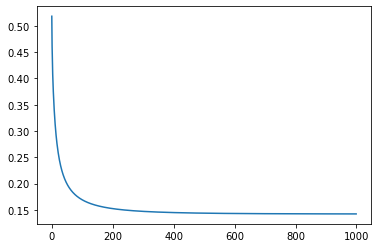

In [25]:
plt.plot(epoch_rate, loss1)

In [26]:
figure(figsize=(10, 6), dpi=80)

<Figure size 800x480 with 0 Axes>

<Figure size 800x480 with 0 Axes>

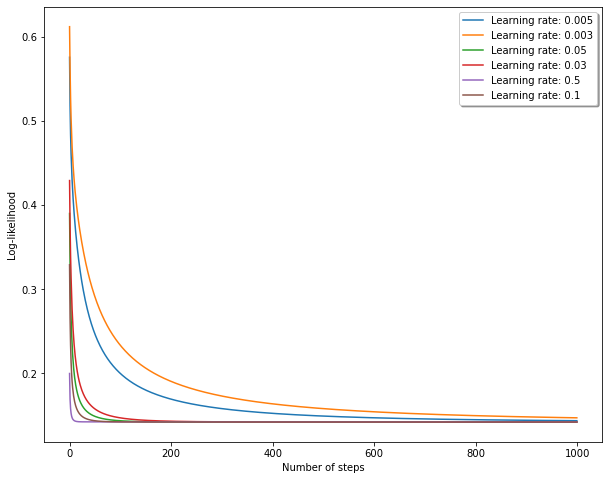

In [27]:
learning_rates = [0.005, 0.003, 0.05, 0.03, 0.5, 0.1]
fig = plt.figure(figsize=(10,8))
for learning in learning_rates:
    w1, b1, loss1, epoch_rate = train(X_train, Y_train, 32, 1000, learning) 
    plt.plot(epoch_rate, loss1, label = 'Learning rate: {}'.format(learning))
plt.xlabel('Number of steps')
plt.ylabel('Log-likelihood')
legend = plt.legend(loc='upper right', shadow=True)

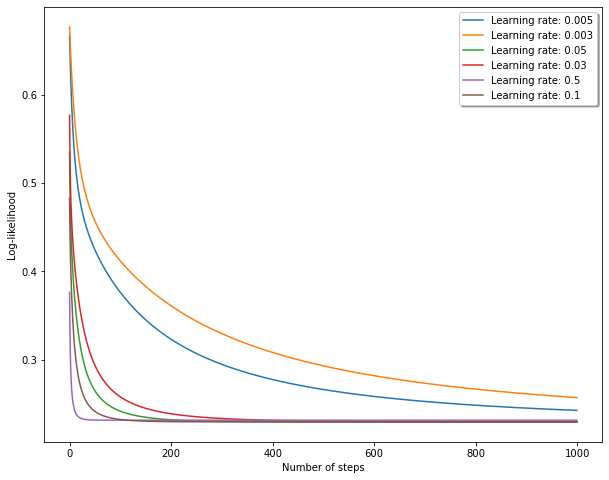

In [28]:
learning_rates = [0.005, 0.003, 0.05, 0.03, 0.5, 0.1]
fig = plt.figure(figsize=(10,8))
for learning in learning_rates:
    w1, b1, loss1, epoch_rate = train(X_test, Y_test, 32, 1000, learning) 
    plt.plot(epoch_rate, loss1, label = 'Learning rate: {}'.format(learning))
plt.xlabel('Number of steps')
plt.ylabel('Log-likelihood')
legend = plt.legend(loc='upper right', shadow=True)
    
    

In [29]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [30]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# X = iris.data
# y = iris.target

In [66]:
idx = iris.target!=2
X2 = iris.data[idx]
y2 = iris.target[idx]

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.15,train_size=0.85,random_state=1)

In [68]:
X_train2 = normalize(X_train2)
X_test2 = normalize(X_test2)

In [69]:
w_iris, b_iris, loss1_iris, epoch_rate_iris = train(X_train2, y_train2, 32, 1000, 0.005)

In [70]:
print(X_train2.shape)

(85, 4)


In [71]:
print(y_train2.shape)

(85,)


In [72]:
acc3 =  accuracy(y_train2, y_hat=predict(X_train2, w_iris, b_iris))
acc3

1.0

In [73]:
acc4 = accuracy(y_test2, y_hat=predict(X_test2, w_iris, b_iris))
acc4

1.0

In [74]:
y_hat=predict(X_test2, w_iris, b_iris)
y_hat

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [75]:
# Using sklearn
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X_train2, y_train2)
print(clf.intercept_, clf.coef_)

[1.75903152] [[ 1.74359492 -0.13506235 13.2306126   7.14926955]]


In [76]:
#sklearn training accuracy
training_acc_sklearn1 = clf.score(X_train2, y_train2)
print(training_acc_sklearn1)

1.0


In [77]:
#sklearn test accuracy
y_pred = clf.predict(X_test2)
test_acc_sklearn2 = clf.score(X_test2, y_test2)
print(test_acc_sklearn2)

1.0


In [78]:
print(clf.classes_)

[0 1]


In [79]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test2, y_pred, labels = [0, 1])
conf_mat

array([[ 4,  0],
       [ 0, 11]], dtype=int64)

Confusion Matrix:  


<Figure size 720x576 with 0 Axes>

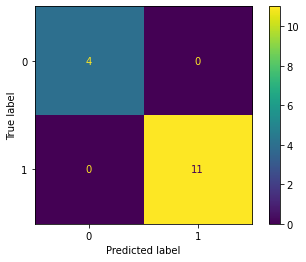

In [80]:
fig = plt.figure(figsize=(10,8))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
print("Confusion Matrix:  ")
display.plot()
plt.show()

Confusion Matrix:  


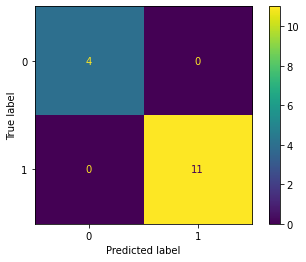

In [81]:
y_hat=predict(X_test2, w_iris, b_iris)
conf_mat1 =  confusion_matrix(y_test2, y_hat, labels = [0, 1])
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=clf.classes_)
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [82]:
idx = iris.target!=1
X4 = iris.data[idx].astype('float64')
y4 = iris.target[idx].astype('float64')
print(y4)
y4 = np.where(y4==2, 1, 0)
y4  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.15,train_size=0.85,random_state=1)

In [84]:
X_train4 = normalize(X_train4)
X_test4 = normalize(X_test4)
y_train4

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [85]:
w_iris2, b_iris2, loss1_iris2, epoch_rate_iris2 = train(X_train4, y_train4, 32, 500, 0.03)
print("w1: ", w1)
print("b1: ", b1)
print("loss1", loss1)
print("epoch_rate", epoch_rate)

w1:  [[-0.2938866 ]
 [ 2.37074827]]
b1:  -3.378244170153711
loss1 [0.48298927586887364, 0.43791948038019524, 0.4113744031420087, 0.3911192888490907, 0.37447941920739053, 0.36043019177536356, 0.3484008581775918, 0.338002196756968, 0.3289433363871067, 0.32099790709011783, 0.3139861202367991, 0.30776337431557216, 0.3022122506183707, 0.297236612245995, 0.29275714816336645, 0.28870796163781903, 0.2850339326140849, 0.2816886616812252, 0.2786328552860464, 0.27583304836095807, 0.2732605868418793, 0.270890811763084, 0.268702400765711, 0.2666768333500279, 0.26479795403264333, 0.26305161345072375, 0.2614253718992401, 0.25990825316648863, 0.2584905391187118, 0.25716359747512474, 0.2559197367562309, 0.2547520835892232, 0.25365447849514555, 0.2526213870237026, 0.25164782368865407, 0.25072928662408617, 0.24986170125576393, 0.24904137158237072, 0.24826493790422346, 0.24752934003401425, 0.2468317851846093, 0.24616971986023586, 0.24554080518524468, 0.24494289519357745, 0.24437401767568848, 0.24383235724

In [86]:
acc5 =  accuracy(y_train4, y_hat=predict(X_train4, w_iris2, b_iris2))
acc5

1.0

In [87]:
acc6 = accuracy(y_test4, y_hat=predict(X_test4, w_iris2, b_iris2))
acc6

0.9333333333333333

Confusion Matrix:  


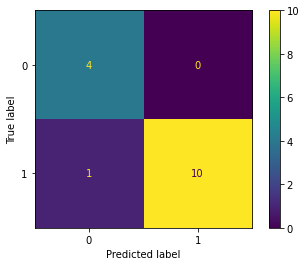

In [88]:
y_hat1=predict(X_test4, w_iris2, b_iris2)
conf_mat2 =  confusion_matrix(y_test4, y_hat1, labels = [0, 1])
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat2, display_labels=clf.classes_)
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [89]:
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X_train4, y_train4)
print(clf.intercept_, clf.coef_)

[0.04160731] [[ 2.2176188  -0.07212468  6.21834546  2.77763253]]


In [90]:
y_pred = clf.predict(X_test4)
test_acc_sklearn4 = clf.score(X_test4, y_test4)
print(test_acc_sklearn4)

0.9333333333333333


Confusion Matrix:  


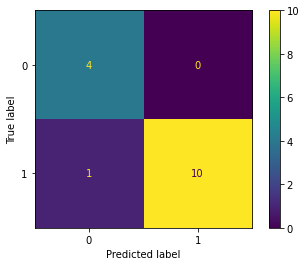

In [91]:
conf_mat_3 =  confusion_matrix(y_test4, y_pred, labels = [0, 1])
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat_3, display_labels=clf.classes_)
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [92]:
idx5 = iris.target!=0
X7 = iris.data[idx5].astype('float64')
y7 = iris.target[idx5].astype('float64')
print(y7)
y7 = np.where(y7==2, 0, 1)
y7  

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.15,train_size=0.85,random_state=1)

In [94]:
# X_train7 = normalize(X_train7)
# X_test7 = normalize(X_test7)

In [95]:
w_iris5, b_iris5, loss1_iris5, epoch_rate_iris5 = train(X_train7, y_train7, 10, 3000, 0.03)
print("w1: ", w_iris5)
print("b1: ", b_iris5)
print("loss1", loss1_iris5)
print("epoch_rate", epoch_rate_iris5)

w1:  [[ 4.17318941]
 [ 4.55883788]
 [-6.14272738]
 [-7.97274204]]
b1:  4.2730251706973075
loss1 [0.6833690083836594, 0.6736443861444855, 0.6641720886881298, 0.6549460504336716, 0.6459596715715256, 0.6372064265168781, 0.6286798750007286, 0.6203736713956103, 0.6122815730369702, 0.6043974475597934, 0.5967152792772094, 0.5892291746350214, 0.5819333667823153, 0.5748222193034349, 0.5678902291606174, 0.5611320288995025, 0.5545423881715855, 0.5481162146285845, 0.5418485542437015, 0.535734591114023, 0.5297696467969142, 0.523949179231348, 0.5182687812927772, 0.5127241790275225, 0.5073112296097859, 0.5020259190614129, 0.49686435977148347, 0.4918227878497579, 0.48689756034501, 0.48208515235637406, 0.4773821540630458, 0.47278526769502827, 0.4682913044651328, 0.4638971814801135, 0.4595999186466708, 0.45539663558606996, 0.4512845485693062, 0.44726096748309957, 0.44332329283549615, 0.43946901280850803, 0.4356957003640028, 0.4320010104079739, 0.428382677017351, 0.4248385107326544, 0.4213663959190352, 0

In [96]:
acc7 =  accuracy(y_train7, y_hat=predict(X_train7, w_iris5, b_iris5))
acc7

0.9647058823529412

In [97]:
acc8 =  accuracy(y_test7, y_hat=predict(X_test7, w_iris5, b_iris5))
acc8

0.9333333333333333

Confusion Matrix:  


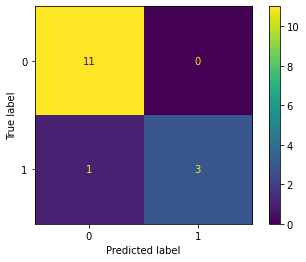

In [238]:
y_hat7=predict(X_test7, w_iris5, b_iris5)
conf_mat5 =  confusion_matrix(y_test7, y_hat7, labels = [0, 1])
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat5, display_labels=clf.classes_)
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [239]:
#sklearn function
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X_train7, y_train7)
print(clf.intercept_, clf.coef_)

[282.87181668] [[ 505.19709426  433.401982   -747.95575693 -582.92099119]]


In [240]:
y_pred = clf.predict(X_test7)
test_acc_sklearn5 = clf.score(X_test7, y_test7)
print(test_acc_sklearn5)

0.9333333333333333


Confusion Matrix:  


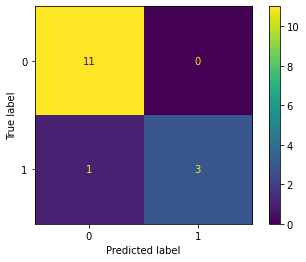

In [241]:
conf_mat_4 =  confusion_matrix(y_test7, y_pred, labels = [0, 1])
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat_4, display_labels=clf.classes_)
print("Confusion Matrix:  ")
display.plot()
plt.show()